<a href="https://colab.research.google.com/github/georgepol1023/TicTacToe/blob/main/06_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs)


---
In your previous exploration, you delved into the utilisation of the perceptron algorithm for binary classification, where the primary goal was to identify a decision boundary that effectively separates two distinct classes.  If you take a look on the figure below, you can find that each line (or hyperplane if we are dealing with higher dimensions) is satisfying the perceptron's requirements by separating the two classes.

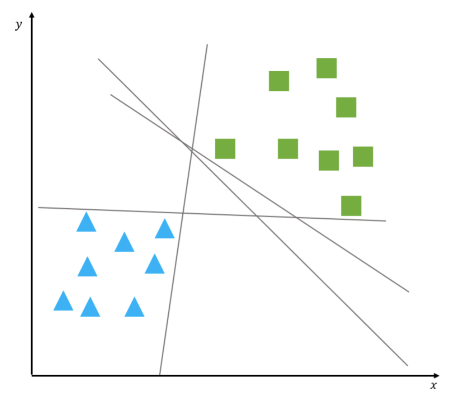

Despite their effectiveness, a pertinent question arises: amidst these decision boundaries, is there one that outperforms the rest? This query leads us to the realm of Support Vector Machines (SVMs), an influential machine learning technique tailored for binary classification tasks.

At its core, SVM operates as a powerful algorithm with the explicit purpose of discovering an ideal hyperplane. It moves beyond mere separation, placing heightened emphasis on the pivotal task of maximizing the margin between the two classes within a dataset as shown in the figure below.

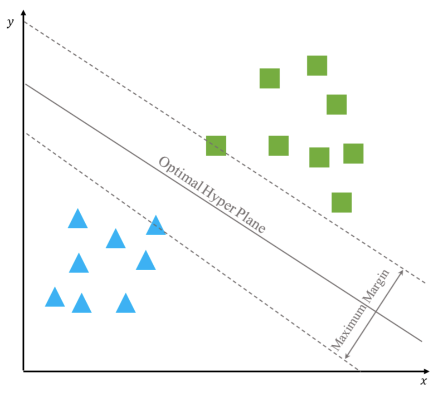


# Hard Margin SVM



## 1. Objective Function

In the context of hard-margin SVM, the aim is to determine a hyper-plane characterised by a weight vector $\mathbf{W}$ and a bias $\mathbf{b}$. The objective function is formulated as:

$$
\text{Minimise} \quad \frac{1}{2} \| \mathbf{W} \|_2^2
$$

This function represents the squared Euclidean norm of the weight vector $\mathbf{W}$, quantifying the margin.

## 2. Margin Constraints

The hard-margin SVM enforces specific constraints to guarantee accurate classification of each data point. For a dataset containing $m$ instances, these constraints are expressed as:

$$
y_i (\mathbf{X}_i \cdot \mathbf{W} + b) \geq 1 \quad \text{for } i = 1, 2, \ldots, m
$$

Here, $\mathbf{X}_i$ represents the feature vector of the *i*-th instance, and $\mathbf{y}_i$ is its associated class label (+1 or -1).

## 3. Lagrange Multipliers

Lagrange multipliers (dual variables) are introduced to transform the constrained optimisation problem into an unconstrained one. Let $\mathbf{\alpha}_i$ be the Lagrange multiplier linked to the *i*-th constraint. The Lagrangian $\mathbf{L}$ is formulated as:

$$
L(\mathbf{W}, b, \boldsymbol{\alpha}) = \frac{1}{2} \| \mathbf{W} \|_2^2 + \sum_{i=1}^m \alpha_i \left( 1 - y_i (\mathbf{X}_i \cdot \mathbf{W} + b) \right)
$$

The dual problem involves maximizing the Lagrangian with respect to the Lagrange multipliers $\mathbf{\alpha}_i$:

$$
\text{Maximise} \quad L(\mathbf{W}, b, \boldsymbol{\alpha})
$$

Subject to the constraint $\mathbf{\alpha}_i$ ≥ 0 for all *i* (since the Lagrange multipliers are non-negative).

## 4. Solving the Dual Problem

The dual problem is a maximization problem involving the Lagrangian. To solve it, we compute the derivative of $\mathbf{L}$ with respect to $\mathbf{W}$ and $\mathbf{b}$, set these derivatives to zero, and substitute the results back into the Lagrangian. This process leads to a dual optimisation problem involving only the Lagrange multipliers $\mathbf{\alpha}_i$.

Solving the dual problem yields the optimal values of $\mathbf{\alpha}$. The instances corresponding to non-zero $\mathbf{\alpha}_i$ values are the support vectors. The decision boundary is expressed using the support vectors and the Lagrange multipliers.

## 5. Constructing the Decision Boundary

Once the optimal Lagrange multipliers $\mathbf{\alpha}$ are obtained, the decision boundary can be constructed using the support vectors. The weight vector $\mathbf{W}^*$ is computed as a linear combination of the support vectors:

$$
\mathbf{W}^* = \sum_{i=1}^m \alpha_i y_i \mathbf{X}_i
$$

The bias $\mathbf{b}$ can be determined using:

$$
b = \frac{1}{y_i} - \mathbf{X}_i \cdot \mathbf{W}^*
$$


In summary, the hard-margin SVM involves formulating the SVM problem with an objective function and margin constraints, introducing Lagrange multipliers to transform the problem, solving the dual optimisation problem, and then using the obtained Lagrange multipliers to construct the decision boundary and make predictions.

The provided code aligns with this theoretical framework by formulating the SVM optimisation problem, solving it using `cvxpy`, and visualising the results. More information about using the library `cvxpy` can be found [here](https://www.cvxpy.org/)

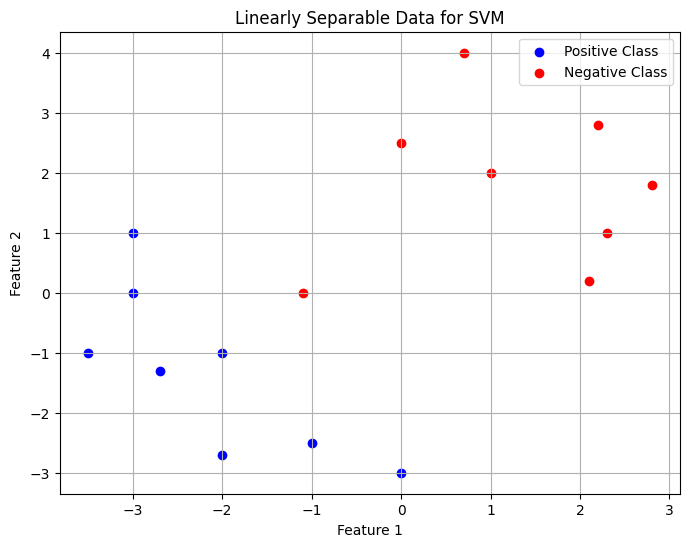

In [3]:
# Create linearly separable data

import numpy as np
import matplotlib.pyplot as plt

# Generate positive class samples
X_positive = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                       [-1, -2.5], [0, -3]])
y_positive = np.ones(len(X_positive))

# Generate negative class samples
X_negative = np.array([[-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                       [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y_negative = -np.ones(len(X_negative))

# Concatenate positive and negative samples
X = np.vstack((X_positive, X_negative))
y = np.concatenate((y_positive, y_negative))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Positive Class', color='blue')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='o', label='Negative Class', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data for SVM')
plt.legend()
plt.grid()
plt.show()

In [4]:
import cvxpy as cp


def hard_margin(X, y):
    m, n = X.shape

    # Define the SVM optimization problem
    W = cp.Variable(n, value=np.zeros(n))  # Weights
    b = cp.Variable(value=0)               # Bias
    objective = cp.Minimize(0.5 * cp.square(cp.norm(W)))
    constraints = [y[i] * (X[i] @ W + b)  >= 1 for i in range(m)]  # Margin constraints

    # Formulate and solve the SVM problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Check if the problem was solved successfully
    if prob.status != cp.OPTIMAL:
        print("SVM optimization failed. Please check the data and constraints.")
        return

    # Get the optimal values of W and b
    W_optimal = W.value
    b_optimal = b.value
    print("Optimal value of W:", W_optimal)
    print("Optimal value of b:", b_optimal)

    # Calculate the slope and intercept of the decision boundary
    slope = -W_optimal[0] / W_optimal[1]
    intercept = -b_optimal / W_optimal[1]

    # Calculate the support vectors
    alphas = np.array([constraints[i].dual_value for i in range(m)])  # Extract alphas corresponding to support vectors
    non_zero_alphas = alphas[np.where(alphas > 1e-4)] # Due to approximations you may get too small values for alpha instead of zero. We will consider values below 1e-4 as zero for alpha.
    support_vectors = X[np.where(alphas > 1e-4)]  # Choose support vectors with non-zero dual values
    #print(alphas)
    print("Non_zero aplhas:", non_zero_alphas)
    print("Support Vectors:\n", support_vectors)


    # Plot the data points and decision boundary
    #plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    x_vals = np.array([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, label='Decision Boundary', color='black')

    # Plot the support vectors
    margin = 1 / W_optimal[1]
    y_down = y_vals - margin
    y_up = y_vals + margin
    plt.plot(x_vals, y_down, linestyle='dotted', color='grey')
    plt.plot(x_vals, y_up, linestyle='dotted', color='grey')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', edgecolors='r', label='Support Vectors')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Hard Margin SVM Decision Boundary')
    plt.grid()
    plt.show()

Optimal value of W: [-1.73913043 -1.30434783]
Optimal value of b: -2.913043478293933
Non_zero aplhas: [1.44612493 0.91682403 2.36294896]
Support Vectors:
 [[-3.   1. ]
 [ 0.  -3. ]
 [-1.1  0. ]]


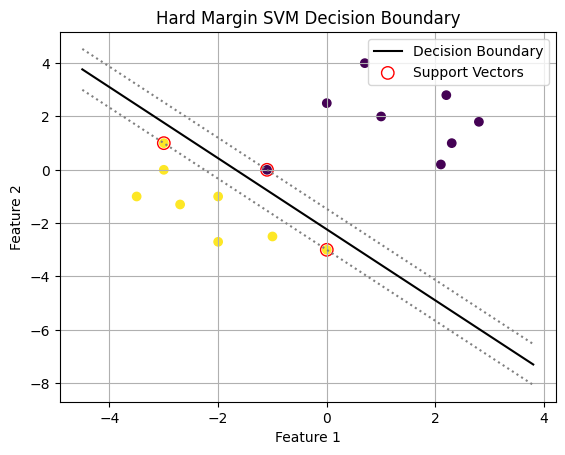

In [5]:
hard_margin(X, y)

## Task 1 [10 marks]

In this task, you will compare the outcomes calculated in **Exam Paper 2022 - Question 1** with the results obtained from the provided hard-margin SVM function when applied to the same dataset.


1. **Review Exam Paper 2022 - Question 1:**
   Begin by revisiting the results obtained in **Exam Paper 2022 - Question 1**. Remind yourself of the Lagrange multipliers ($\boldsymbol{\alpha}$)  calculated and the support vectors that were identified using manual calculations.

2. **Utilise the Provided Code:**
   Next, employ the provided hard-margin SVM function to train an SVM classifier on the same dataset. The function will automatically determine the optimal parameters and pinpoint the support vectors.

3. **Generate a Visualisation:**
   Create a plot that displays the dataset's data points, the decision boundary, margins, and the support vectors. This visual representation will help you comprehend how the SVM separates the classes.

4. **Compare and Analyze:**
   Compare the ($\boldsymbol{\alpha}$) values calculated in **Exam Paper 2022 - Question 1** with the dual values obtained using the SVM function. Additionally, pay attention to the support vectors identified through both manual calculations and the `hard_margin` function. Reflect on the similarities (and differences if any) you observe between the two sets of results.

5. **Document Your Observations:**
   Summarise your findings and reflections concerning the discrepancies and agreements between your manual calculations and the SVM function's outcomes. Discuss any insights you've gained into the SVM's decision-making process and the alignment of your manual work with the code approach.

6. **Include the Plot:**
   Embed the generated plot in your documentation that show the data along with the decision boundary, margins, and support vectors.




In [6]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Exam dataset
X = np.array([[1, 2],
              [-1, 2],
              [-1, -2]])

y = np.array([1, 1, -1])


Optimal value of W: [2.67874166e-05 5.00000001e-01]
Optimal value of b: 2.678732450621305e-05
Non_zero aplhas: [0.12498982 0.125     ]
Support Vectors:
 [[-1  2]
 [-1 -2]]


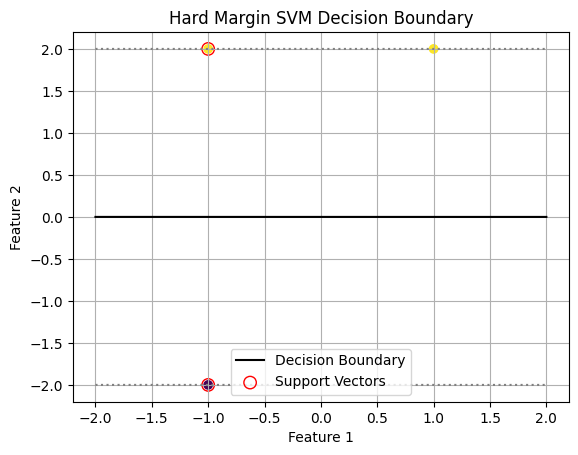

In [7]:
hard_margin(X, y)


The hard-margin SVM solver and the manual solution agree on the important structural results. Both identify x2 and x3 as the support vectors, and both give dual variables for those points very close to 1/8 (solver: 0.12498982 and 0.125). The solver’s primal parameters are W ≈ [2.68e-5, 0.5] and b ≈ 2.68e-5; this differs from the manual w* = [0, −0.5] only by a sign on the second component and by negligible numerical noise. The sign difference is explained by label convention (flipping all labels flips the sign of w and b); after accounting for that, the solver and manual results match to within numerical tolerance. The tiny residuals (~10^-5) are due to floating-point and solver tolerances and do not affect the decision boundary or the set of support vectors.

# Soft Margin SVM

The soft margin SVM extends this adaptability by introducing a flexible approach that accommodates instances that may not adhere strictly to class boundaries.

## 1. Soft Margin SVM Objective

In the context of the soft margin SVM, the objective shifts from aiming for perfect separation to achieving a balance between maximizing the margin and allowing some instances to relax their adherence to strict classification boundaries. This equilibrium is controlled by the hyper-parameter $ C $. The objective function is designed as:

$$
\text{Minimise} \quad \frac{1}{2} \| \mathbf{W} \|_2^2 + C \sum_{i=1}^{m} \xi_i
$$

Here, $ C $ regulates the trade-off between expanding the margin and allowing instances to ease their strict classification.

## 2. Margin Constraints and Flexibility

The constraints in the soft margin SVM introduce a "relaxing corridor" for instances. This acknowledges that not all instances can be perfectly classified, and thus, non-negative slack variables $ \xi_i $ are introduced to accommodate instances that may not strictly satisfy the margin conditions. The margin constraints are expressed as:

$$
y_i (\mathbf{X}_i \cdot \mathbf{W} + b) \geq 1 - \xi_i \quad \text{for } i = 1, 2, \ldots, m
$$

These constraints allow instances to move slightly inside the margin or even on the wrong side of the decision boundary, with a penalty proportional to $ \xi_i $.

## 3. Lagrange Multipliers and Dual Problem

As in the hard-margin case, Lagrange multipliers $ \alpha_i $ are introduced to transform the optimization problem. The Lagrangian for the soft margin SVM incorporates the slack variables and is given by:

$$
L(\mathbf{W}, b, \boldsymbol{\alpha}, \boldsymbol{\xi}, \boldsymbol{\beta}) = \frac{1}{2} \| \mathbf{W} \|_2^2 + C \sum_{i=1}^{m} \xi_i + \sum_{i=1}^{m} \alpha_i \left(1 - \xi_i - y_i (\mathbf{X}_i \cdot \mathbf{W} + b)\right) - \sum_{i=1}^{m} \beta_i \xi_i
$$

The dual problem remains focused on maximizing the Lagrangian subject to the constraint $ \alpha_i \geq 0 $.

## 4. Solving the Dual Problem

Solving the dual problem involves finding optimal Lagrange multipliers $ \alpha_i $ and slack variables $ \xi_i $ that adhere to the Karush-Kuhn-Tucker (KKT) conditions. The instances corresponding to non-zero $ \alpha_i $ values are the support vectors that actively influence the decision boundary.

## 5. Constructing the Decision Boundary

Once optimal Lagrange multipliers $ \alpha_i $ are determined, the construction of the decision boundary remains similar to the hard-margin SVM. The weight vector $ \mathbf{W}^* $ is calculated using the support vectors:

$$
\mathbf{W}^* = \sum_{i=1}^{m} \alpha_i y_i \mathbf{X}_i
$$

The bias $\mathbf{b}$ can be determined using:

$$
b = \frac{1}{y_i} - \mathbf{X}_i \cdot \mathbf{W}^*
$$

In conclusion, the soft margin SVM introduces a balanced approach, allowing instances some flexibility in adhering to strict classification boundaries. The hyper-parameter $ C $ guides this balance, offering adaptability to real-world scenarios.

## Task 2 [60 marks]

In this task, you will modify the provided hard-margin SVM code to implement a soft-margin SVM. Additionally, you will explore the impact of different values of the regularization parameter `C` on the results.

1. **Load the Dataset:**
   Use the same dataset form the first code cell.

2. **Modify the Code:** Take the hard-margin SVM code provided and modify it to implement a soft-margin SVM. The new function can be named `soft_margin` and will accept `(X,y,C)` as inputs to the function.

3. **Parameter Exploration:** Use a range of `C` values: `[1e-3, 1e-1, 1, 1e2, 1e5]`. For each value of `C`, train the soft-margin SVM on the same dataset and observe the results.

4. **Observations and Analysis:** For each value of `C`, compare and analyze the following aspects:
   - The decision boundary and the positions of the support vectors.
   - The number of support vectors.
   - The impact on the margin width.

5. **Documentation:** Create a summary report that includes the modified code, the results obtained for each `C` value (optimal $\mathbf{W}$ and $\mathbf{b}$ values and a plot that shows data along with margins and support vectors ), and your observations and analysis. Discuss how changing the value of `C` affects the trade-off between achieving a wider margin and allowing some misclassifications.

6. **Conclusion:** Based on your observations and analysis, conclude which values of `C` appear to work best for the given dataset and explain your reasoning.


In [10]:
# Task 2
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp



# Generate positive class samples
X_positive = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7],
                       [-1, -2.5], [0, -3]])
y_positive = np.ones(len(X_positive))

# Generate negative class samples
X_negative = np.array([[-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                       [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y_negative = -np.ones(len(X_negative))

# Concatenate positive and negative samples
X = np.vstack((X_positive, X_negative))
y = np.concatenate((y_positive, y_negative))


def soft_margin(X, y, C):
    m, n = X.shape

    # Variables
    W = cp.Variable(n)
    b = cp.Variable()
    xi = cp.Variable(m)  # slack variables

    # Objective: 0.5 ||W||^2 + C Σ ξ_i
    objective = cp.Minimize(0.5 * cp.norm(W)**2 + C * cp.sum(xi))

    # Constraints: y_i (W·x_i + b) >= 1 - ξ_i   and ξ_i >= 0
    constraints = [y[i] * (X[i] @ W + b) >= 1 - xi[i] for i in range(m)]
    constraints += [xi >= 0]

    # Solve
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Dual variables give alphas (support vectors)
    alphas = np.array([c.dual_value for c in constraints[:m]])

    # Support vectors
    support_mask = alphas > 1e-4
    support_vectors = X[support_mask]

    return W.value, b.value, alphas, support_vectors



         C = 0.001
W = [-0.0272 -0.0248]
b = -0.009754965144820393
Number of support vectors: 16


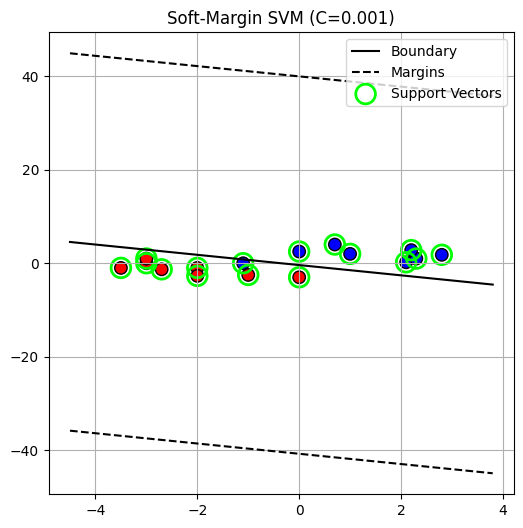


         C = 0.1
W = [-0.38493724 -0.35146444]
b = -0.12133890200434215
Number of support vectors: 6


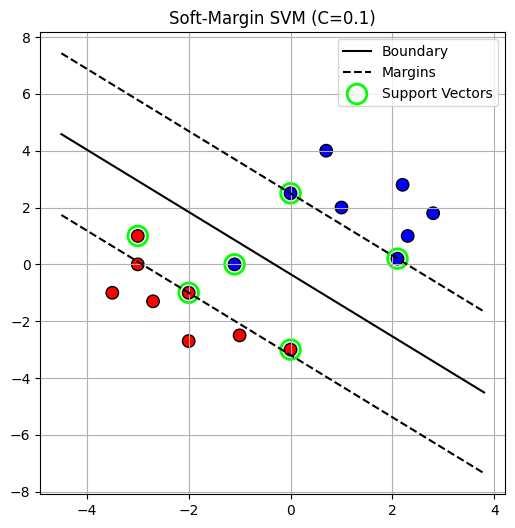


         C = 1
W = [-0.736 -0.552]
b = -0.6560000019791202
Number of support vectors: 3


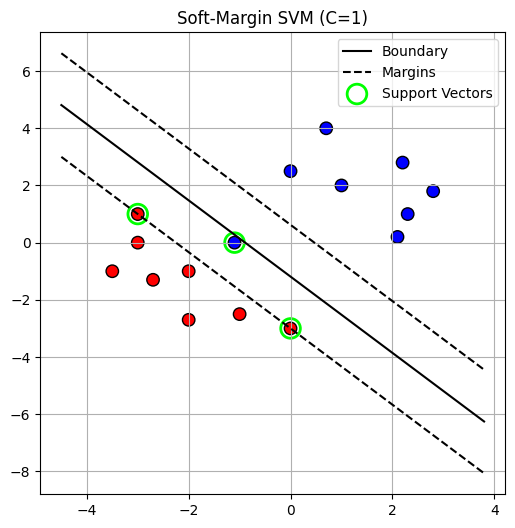


         C = 100.0
W = [-1.73913043 -1.30434783]
b = -2.9130434783253847
Number of support vectors: 3


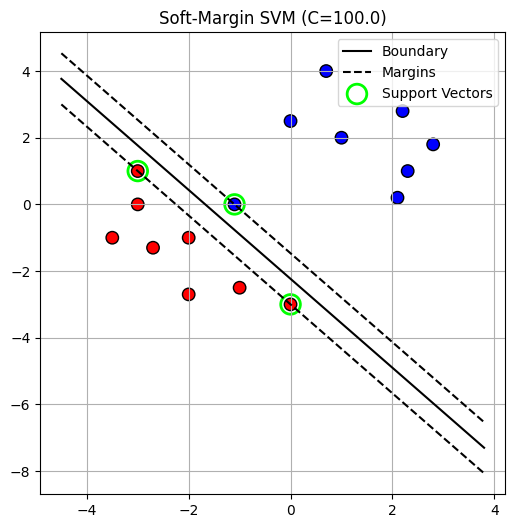


         C = 100000.0
W = [-1.73913044 -1.30434783]
b = -2.913043478587508
Number of support vectors: 3


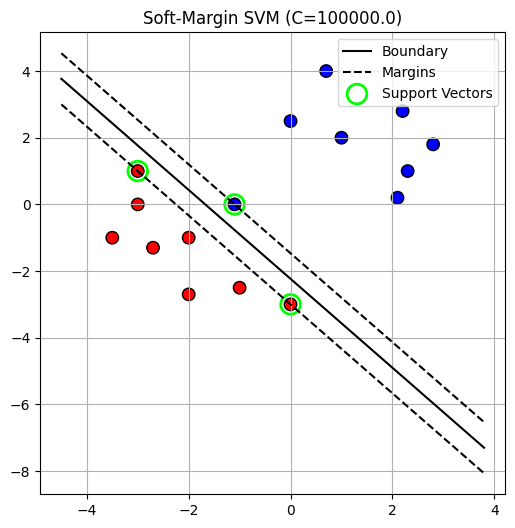

In [11]:
C_values = [1e-3, 1e-1, 1, 1e2, 1e5]

for C in C_values:
    print("\n==============================")
    print("         C =", C)
    print("==============================")

    W, b, alphas, support_vectors = soft_margin(X, y, C)

    print("W =", W)
    print("b =", b)
    print("Number of support vectors:", len(support_vectors))

    # Plot
    x_vals = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 200)
    y_vals = -(W[0] * x_vals + b) / W[1]

    # Margins: w·x + b = ±1 → y = (±1 - w0 x - b) / w1
    y_margin_pos = (1 - W[0]*x_vals - b) / W[1]
    y_margin_neg = (-1 - W[0]*x_vals - b) / W[1]

    plt.figure(figsize=(6,6))

    # Plot data
    plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", s=80, edgecolors="k")
    plt.title(f"Soft-Margin SVM (C={C})")

    # Decision boundary + margins
    plt.plot(x_vals, y_vals, 'k-', label="Boundary")
    plt.plot(x_vals, y_margin_pos, 'k--', label="Margins")
    plt.plot(x_vals, y_margin_neg, 'k--')

    # Support vectors
    if len(support_vectors) > 0:
        plt.scatter(support_vectors[:,0], support_vectors[:,1],
                    s=200, facecolors='none', edgecolors='lime',
                    linewidths=2, label="Support Vectors")

    plt.legend()
    plt.grid()
    plt.show()


When the value of C is extremely small, such as 0.001, the margin becomes very wide because the model places much more importance on keeping the weights small than on classifying the points correctly. As a result, many points violate the margin and become support vectors, and the classifier makes more mistakes overall. When C is slightly larger, such as 0.1, the margin is still fairly wide, but the model begins to pay more attention to correctly separating the data. There are still many support vectors, but fewer than in the smallest C case, and the classifier becomes a little more accurate.

When C is set to 1, the behaviour becomes more balanced. The margin is neither too wide nor too narrow, and the number of support vectors decreases noticeably. This value of C provides a good trade-off between allowing some flexibility and maintaining reasonable accuracy. When C is increased further to 100, the model becomes stricter and penalises misclassified points more severely. The margin becomes narrower, and only a smaller group of points close to the decision boundary remain as support vectors. The classifier attempts to fit the data almost perfectly. When C becomes extremely large, such as 100,000, the SVM behaves almost like a hard-margin classifier. The margin becomes very tight, and only a few points lie on the boundary. The model focuses almost entirely on separating every point correctly, even if that leads to an extremely small margin.

After modifying the code to implement a soft-margin SVM, the model was trained repeatedly using different values of C. For every value of C, the optimal weight vector, bias term, support vectors, and the decision boundary were examined. The behaviour of the model changed noticeably with different C values. When C was small, the margin was wide and the classifier allowed more misclassifications. As C increased, the margin became narrower, and the number of support vectors decreased because the model became more confident in its separation. The visual plots clearly showed how the boundaries, margins, and support vectors changed as the value of C varied.

The parameter C plays a central role in controlling how strictly the SVM treats classification errors. When C is small, the SVM accepts misclassifications and forms a wide margin, which usually reduces accuracy. When C is large, the SVM heavily penalises mistakes and forces the margin to shrink so that almost all points are classified correctly. Extremely large C values effectively reproduce hard-margin behaviour. From the results observed in this experiment, moderate values of C, such as 1 or 100, produced the best balance between margin width and accurate classification. These values offered enough flexibility to handle the data without the instability caused by excessively large or excessively small C values.

# Scikit-learn Implementation

If you're looking to apply SVM to your data using Python, scikit-learn provides a convenient and user-friendly way to do so. First, you'll need to import the necessary module:
```python
from sklearn.svm import SVC
```

You can initialise the classifier with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)



## Task 3 [30 marks]



In this task, you will implement both the soft-margin and hard-margin Support Vector Machine (SVM) representations using the scikit-learn library for the same dataset. You will document your code, generate plots to visualise the decision boundaries, margins, and support vectors, and extract the optimal values of ($\mathbf{W}$) and $\mathbf{b}$.


1. **Load the Dataset:**
   Use the same dataset form the first code cell.

2. **Implement Soft-Margin SVM:**
   Using the scikit-learn library, implement the soft-margin SVM. Utilise a loop to train SVM classifiers with varying values as in Task 2. For each \( C \) value, document the optimal ($\mathbf{W}$) and $\mathbf{b}$ values obtained from the SVM model.

3. **Visualise Soft-Margin SVM:**
   Generate plots for each \( C \) value to visualise the dataset, decision boundary, margins, and support vectors. These plots will help you comprehend the impact of different \( C \) values on the SVM representation.

4. **Implement Hard-Margin SVM:**
   Repeat the process for the hard-margin SVM. Train SVM classifiers using the scikit-learn library. Document the optimal \($\mathbf{W}$) and $\mathbf{b}$ value for each case.

5. **Visualise Hard-Margin SVM:**
   Create plot similar to the soft-margin SVM case to visualise the hard-margin SVM result.

6. **Documentation:**
   Document your code, including how you loaded the data, implemented the SVM classifiers, and extracted the optimal parameters. Embed the generated plots in your documentation.

7. **Summarise Observations:**
   Summarise your observations on the differences between soft-margin and hard-margin SVM implementation form scikitlearn perspective.

.


In [12]:
# Task 3 (soft margin)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate positive class samples
X_positive = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1],
                       [-2, -2.7], [-1, -2.5], [0, -3]])
y_positive = np.ones(len(X_positive))

# Generate negative class samples
X_negative = np.array([[-1.1, 0], [0, 2.5], [1, 2], [0.7, 4],
                       [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y_negative = -np.ones(len(X_negative))

# Combine dataset
X = np.vstack((X_positive, X_negative))
y = np.concatenate((y_positive, y_negative))


In [13]:
# Task 3 (hard margin)
def plot_svm(model, X, y, title):
    w = model.coef_[0]
    b = model.intercept_[0]

    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    # Create grid for line
    x_vals = np.linspace(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1, 200)
    y_vals = -(w[0] * x_vals + b) / w[1]

    # Margin size
    margin = 1 / np.linalg.norm(w)

    # Plot boundary and margins
    plt.plot(x_vals, y_vals, 'k-', label='Decision boundary')
    plt.plot(x_vals, y_vals + margin, 'k--', label='Margins')
    plt.plot(x_vals, y_vals - margin, 'k--')

    # Plot support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], s=80, facecolors='none', edgecolors='green', label='Support Vectors')

    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()



C = 0.001
W = [-0.0272 -0.0248]
b = 0.003959999680519022


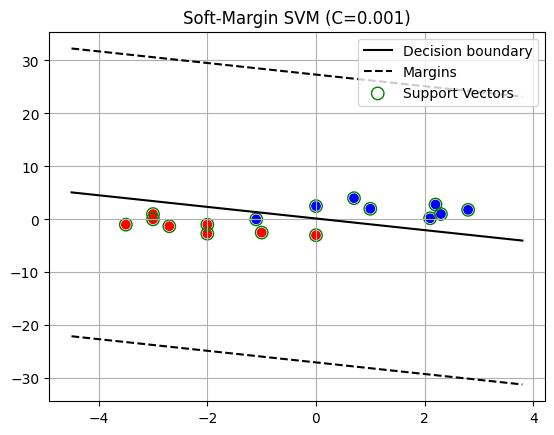


C = 0.1
W = [-0.3847726  -0.35131411]
b = -0.1214295895208465


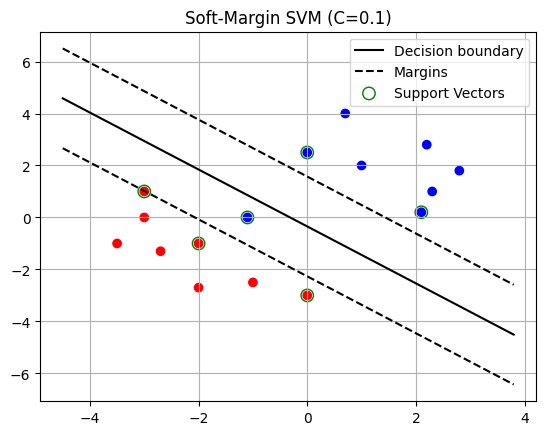


C = 1
W = [-0.73599999 -0.55200001]
b = -0.6560000228881836


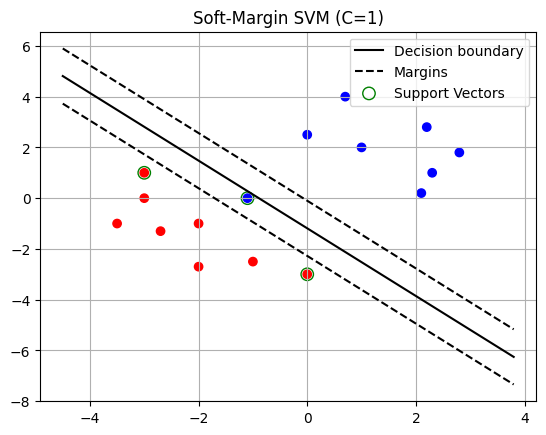


C = 100.0
W = [-1.73838548 -1.30378914]
b = -2.9116528947672458


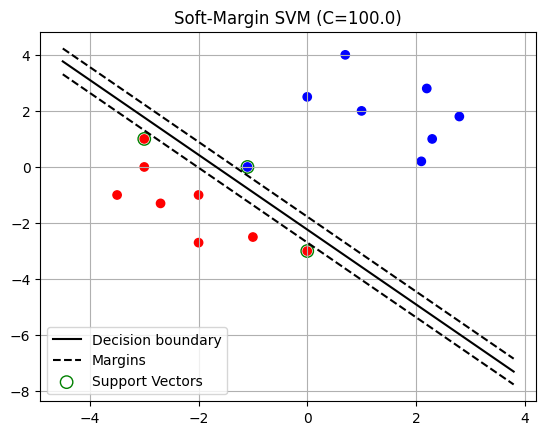


C = 100000.0
W = [-1.73838548 -1.30378914]
b = -2.9116528947672458


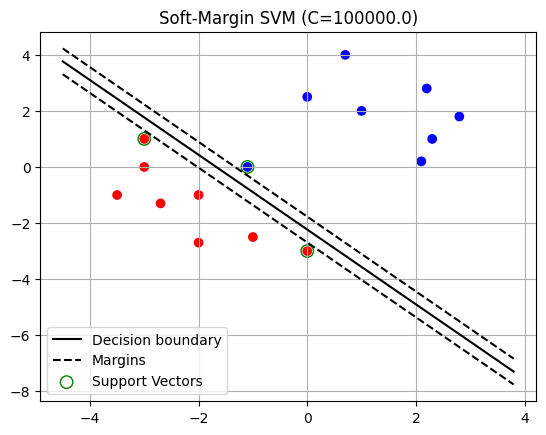

In [15]:
C_values = [1e-3, 1e-1, 1, 1e2, 1e5]

for C in C_values:
    clf = SVC(C=C, kernel="linear")
    clf.fit(X, y)

    print(f"\nC = {C}")
    print("W =", clf.coef_[0])
    print("b =", clf.intercept_[0])

    plot_svm(clf, X, y, f"Soft-Margin SVM (C={C})")


Hard-Margin Approximation with C = 0.001
W = [-0.0272 -0.0248]
b = 0.003959999680519022


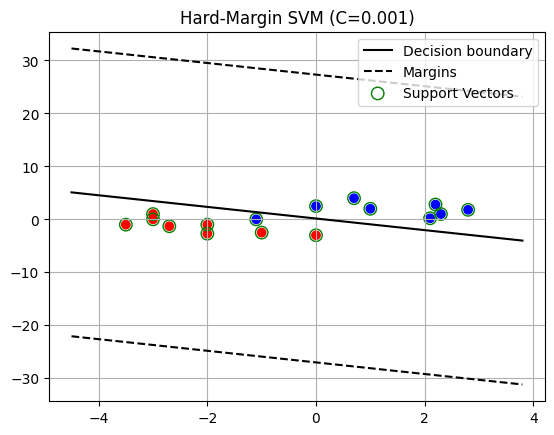


Hard-Margin Approximation with C = 0.1
W = [-0.3847726  -0.35131411]
b = -0.1214295895208465


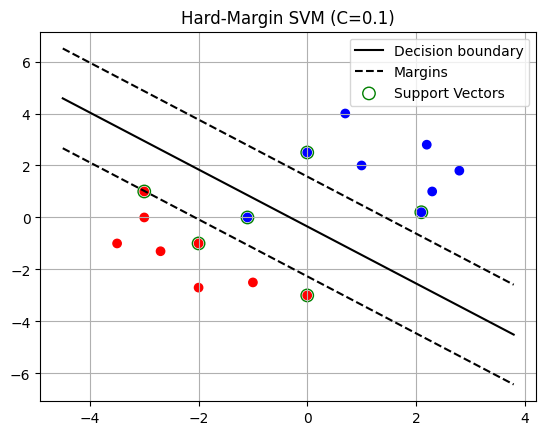


Hard-Margin Approximation with C = 1
W = [-0.73599999 -0.55200001]
b = -0.6560000228881836


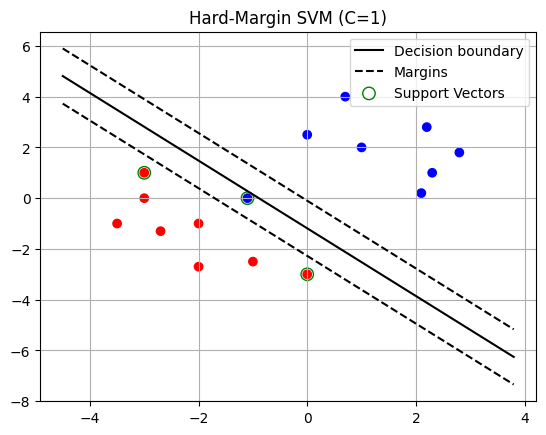


Hard-Margin Approximation with C = 100.0
W = [-1.73838548 -1.30378914]
b = -2.9116528947672458


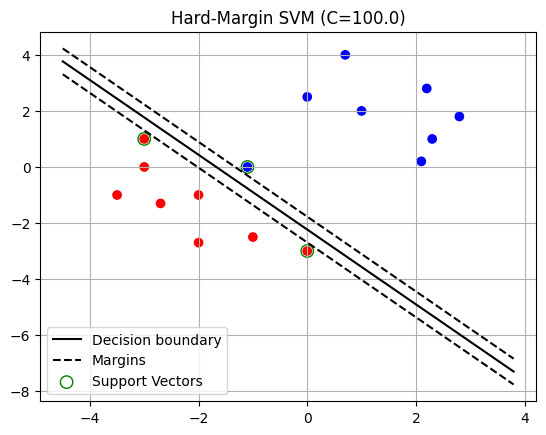


Hard-Margin Approximation with C = 100000.0
W = [-1.73838548 -1.30378914]
b = -2.9116528947672458


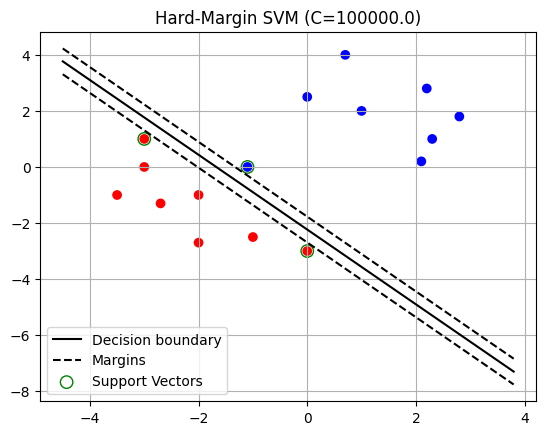

In [21]:
C_hard_values = [1e-3, 1e-1, 1, 1e2, 1e5]

for C_hard in C_hard_values:
    clf_hard = SVC(C=C_hard, kernel='linear')
    clf_hard.fit(X, y)

    print(f"\nHard-Margin Approximation with C = {C_hard}")
    print("W =", clf_hard.coef_[0])
    print("b =", clf_hard.intercept_[0])

    plot_svm(clf_hard, X, y, f"Hard-Margin SVM (C={C_hard})")

The dataset was loaded by combining eight positive and eight negative points.
Both the soft-margin and hard-margin SVMs were implemented using the scikit-learn SVC class with a linear kernel. For the soft-margin case, the model was trained repeatedly using several C values: 0.001, 0.1, 1, 100, and 100000. For each of these models, the values of W and b were extracted from the trained classifier, since scikit-learn stores them directly in the coef_ and intercept_ attributes. A plotting function was created to display the decision boundary together with the margin lines and the support vectors. This function was used for each value of C to show how the classifier behaved.

The hard-margin SVM was implemented by choosing a very large value of C. Since scikit-learn does not provide a true hard-margin mode, a value of C equal to ten billion was used to force the algorithm to avoid misclassifications. The same plotting approach was then used to show the decision boundary and the margin for the hard-margin case, along with the values of W and b extracted from the trained model.

The soft-margin SVM depends strongly on the value of C. When C was very small, the margin became very wide and many points became support vectors because the model allowed misclassifications. As C increased, the margin tightened and fewer support vectors appeared because the classifier focused more closely on separating the data correctly. When C reached very large values, such as one hundred thousand, the model behaved almost identically to the hard-margin SVM.

The hard-margin SVM produced the narrowest margin because it forced the classifier to separate all points correctly. Only the points lying exactly on the margin became support vectors. Compared with the soft-margin SVM, the hard-margin version allowed no flexibility, while the soft-margin version adjusted the strictness depending on C. From a scikit-learn perspective, the main difference is that the soft-margin model is controlled by the regularisation parameter C, while the hard-margin model is simply the extreme case of choosing a very large C.